In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')
df

#The raw data with different feature

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [16]:
pdf = df[['Survived','Fare']]
spdf = pdf.sort_values(by=['Fare'])
spdf

#This dataframe is data sperated from original date with suvived and fare.

,Survived,Fare
275,0,0.0000
478,0,0.0000
411,0,0.0000
594,0,0.0000
630,0,0.0000
...,...,...
27,0,263.0000
339,1,263.0000
733,1,512.3292
257,1,512.3292


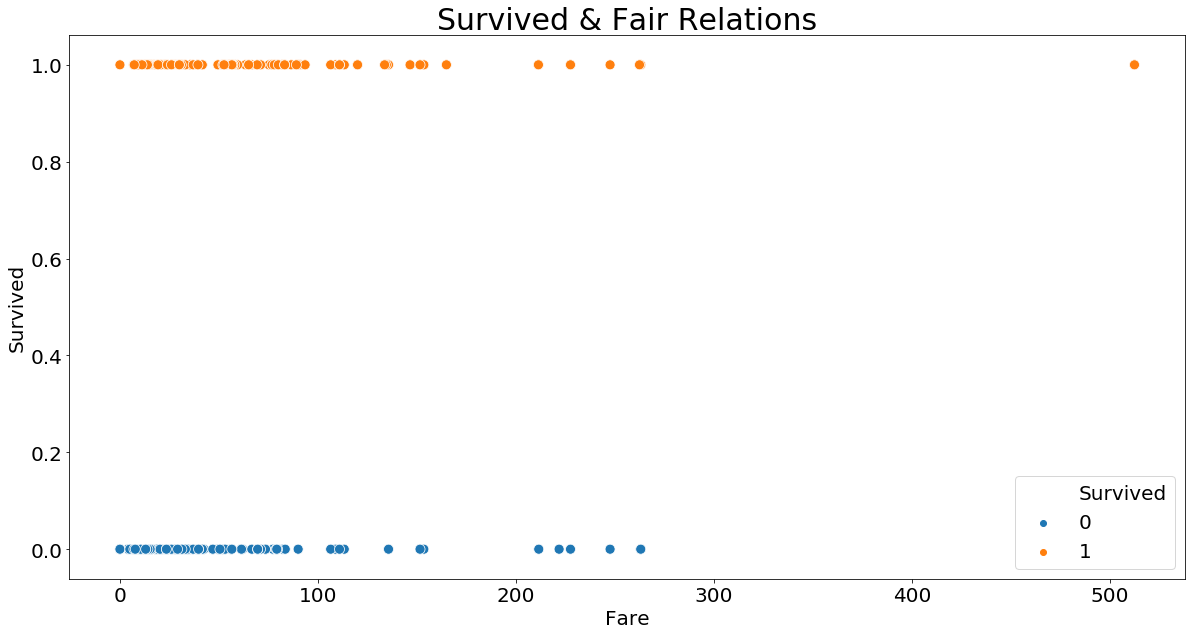

In [9]:
import seaborn as sns
%matplotlib inline
# sns.scatterplot(x='Fare',y='Survived', hue='Survived',data = df)
#histogram, boxplot

f, ax= plt.subplots(figsize = (20, 10))
ax =sns.scatterplot(x='Fare',y='Survived', hue='Survived',data = df,s=100)
plt.xlabel("Fare", fontsize=20)
plt.ylabel("Survived", fontsize=20)
plt.title('Survived & Fair Relations',fontsize = 30)
ax.tick_params(axis='y',labelsize=20)
ax.tick_params(axis='x',labelsize=20)
ax.legend(loc=0, prop={'size': 20})

#The plot is fair and survived relations.
#In this plot we can know the person who pay the most survived.
#But for ones who pay less than $300, it cannot easily tell a story.

In [10]:
# sns.scatterplot(x='Pclass',y='Fare',hue='Survived',data = df)

In [11]:
df = pd.read_csv('titanic.csv')
pdf = df[['Survived','Fare']]
spdf = pdf.sort_values(by=['Fare'])
spdf = spdf.reset_index(drop=True)
max_fare = spdf.iloc[len(spdf)-1:len(spdf)]['Fare']
result = pd.DataFrame()

bound_size = 18


for i in range((int)(1 + max_fare/bound_size)):
    lower_bound = i*bound_size
    upper_bound = lower_bound + bound_size
    bound_name = "[ " + str(lower_bound) + ", " + str(upper_bound) + ")"
        
    df_fare_in_bound = spdf[spdf['Fare']>=lower_bound]
    df_fare_in_bound = df_fare_in_bound[df_fare_in_bound['Fare'] < upper_bound]
    
    
    total_num = len(df_fare_in_bound)
    
    df_survive_in_bound = df_fare_in_bound[df_fare_in_bound['Survived'] == 1]
    survive_num = len(df_survive_in_bound)
    
#     print(i)
#     print(total_num)
#     print(survive_num)
#     print("***")
    
    if total_num == 0:
        result = result.append({'Index':lower_bound, 'Range': bound_name, 'Rate': -1}, ignore_index=True)
    
    else:
        survive_rate = survive_num / total_num
        #result[bound_name] = survive_rate

        result = result.append({'Index':lower_bound, 'Range': bound_name, 'Rate': survive_rate}, ignore_index=True)

pure_result = result[result['Rate'] != -1]  


/Users/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


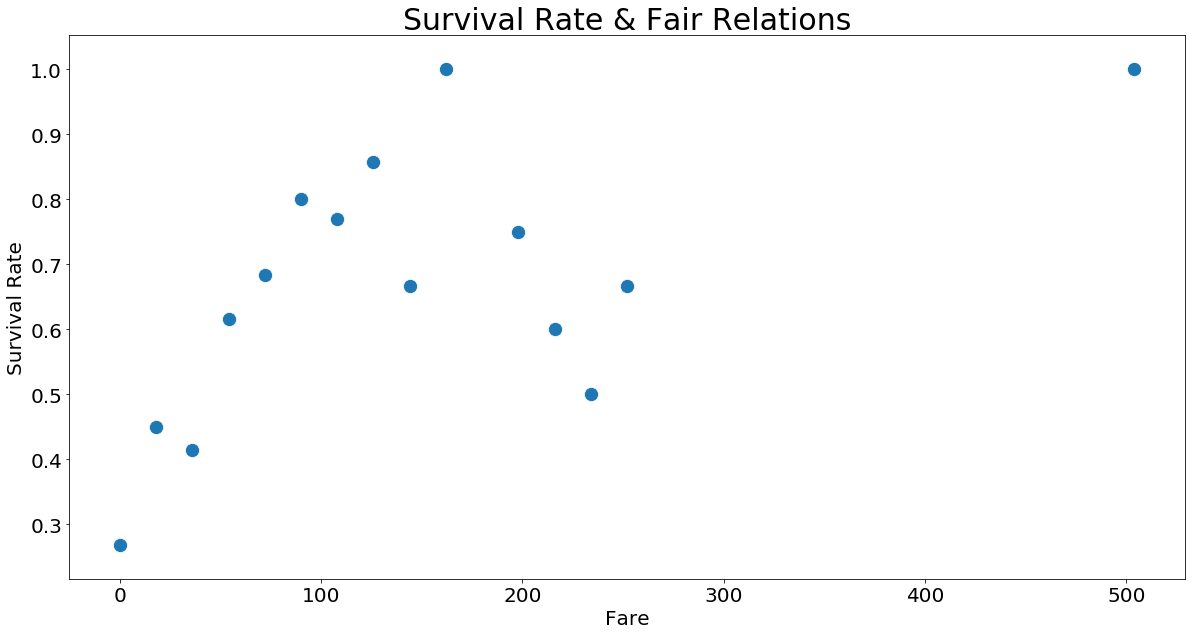

In [12]:
pure_result['Index'] = pure_result
import seaborn as sns
%matplotlib inline

f, ax= plt.subplots(figsize = (20, 10))
ax = sns.scatterplot(x = 'Index',y='Rate',data = pure_result,s=200)
plt.xlabel("Fare", fontsize=20)
plt.ylabel("Survival Rate", fontsize=20)
plt.title('Survival Rate & Fair Relations',fontsize = 30)
ax.tick_params(axis='y',labelsize=20)
ax.tick_params(axis='x',labelsize=20)

#I groupped the data. Each group is slot $18, like $0-$18, $18-$36 ...
#Also, I calculated the survival rate.
#And I used the new dataframe to plot survival rate and fair relations.
#It shows that ones who pay less than $200, the survival rate is linear.
#But in the fare between $200-$300, the survival rates drop.
#And the $500 guy survived.


Text(0, 0.5, 'Survival Rate')

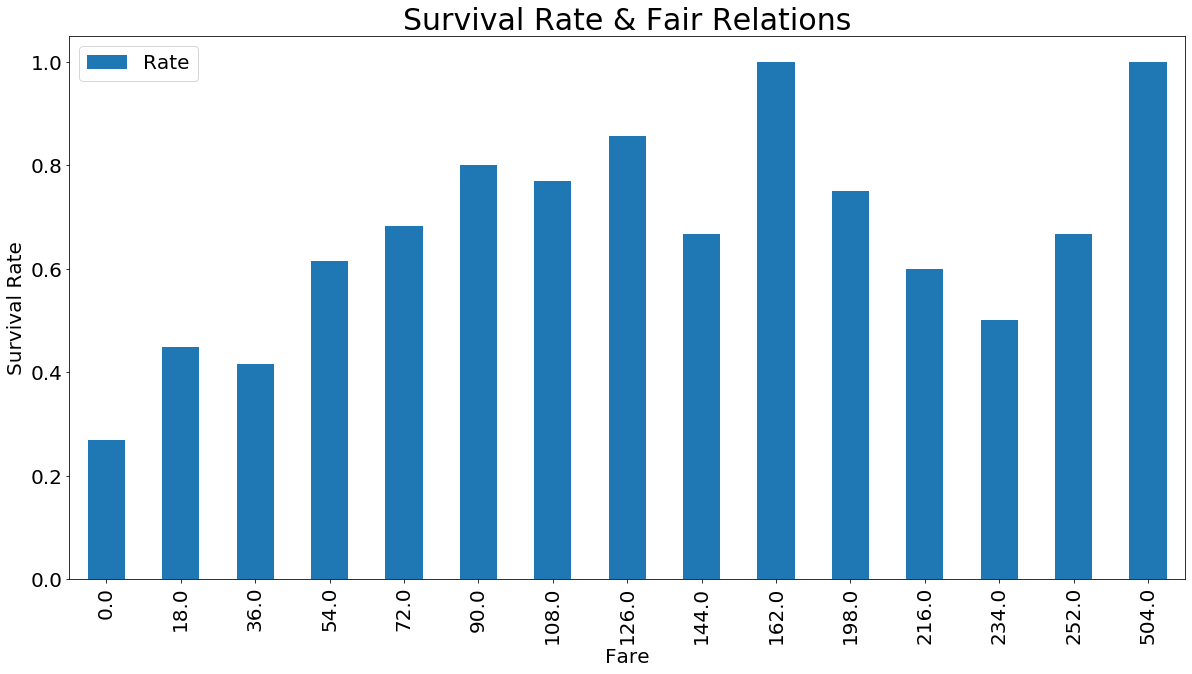

In [13]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

ax = pure_result.plot.bar(x='Index',title = 'Survival Rate & Fair Relations',figsize = (20,10),fontsize = 20)
ax.title.set_size(30)
# ax.set(xlabel="Fare", ylabel="Rate")
ax.legend(loc=2, prop={'size': 20})
plt.xlabel("Fare", fontsize=20)
plt.ylabel("Survival Rate", fontsize=20)

#This plot is drawn by using the same groupped dateframe.
#It also shows linear, drop, and the highest.

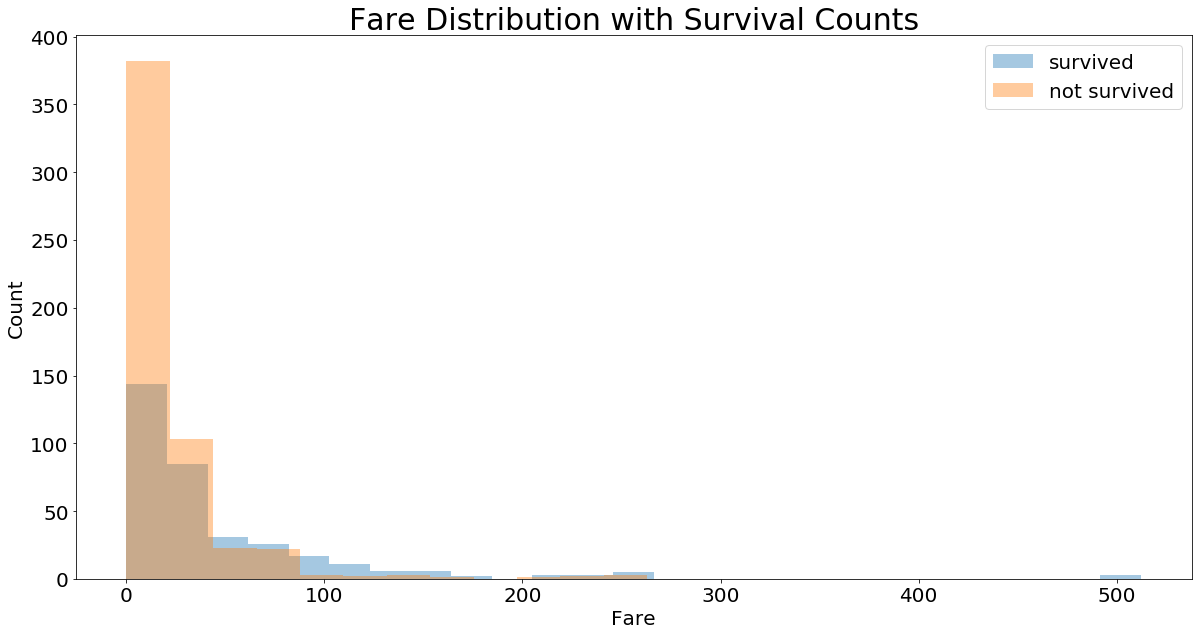

In [14]:
survived = 'survived'
not_survived = 'not survived'
fs = 20
fig, ax = plt.subplots(figsize=(20,10))
# fig.suptitle('Fare Distribution with Survival Counts', fontsize=30)
plt.xlabel('Fare', fontsize=fs)
plt.ylabel('Count', fontsize=fs)
plt.rc('legend', fontsize=fs) 
ax = sns.distplot(df[df['Survived']==1].Fare.dropna(), bins=25, label = survived, kde =False)
ax = sns.distplot(df[df['Survived']==0].Fare.dropna(), bins=12, label = not_survived, kde =False)
ax.legend()
plt.title('Fare Distribution with Survival Counts',fontsize = 30)


ax.tick_params(axis='y',labelsize=fs)
ax.tick_params(axis='x',labelsize=fs)

#This plot is drawn by using original data, but presenting survived and not survived seperatedly.
#It is interested that ones who pay less than %85 died more than survived.
#And ones who pay more than %85, survived a lot.
